# Analysis of Charity's Presented on ACNC Website

Data sourced by Tony
Method: Web Scraping

In [10]:
#Collate the data from the main file
import pandas as pd

sizes = ['Small', 'Medium', 'Large']
finaldf = pd.DataFrame()

for s in sizes:
    tempdf = pd.read_csv('./'+s+'/combined_scraped_list.csv',index_col=0)
    finaldf = pd.concat((finaldf,tempdf),axis=0)

df= finaldf
df.head()


,ABN,Index_Link,Legal_Name,Town/Suburb,State,Status,Size,website,revenue,expenses,causes,lastreport,religious_ref,Number_of_Responsible_Persons,Registration_Date,Date_Organisation_Established
0,50624543616,https://www.acnc.gov.au/charity/charities/122e...,Golden Grove Uniting Church,Golden Grove,SA,Registered,Small,http://goldengroveuniting.org.au/,0.0,0.0,Adults - aged 25 to under 65; Children - aged ...,11 May 2022,1.0,7.0,03/12/2012,01/01/1977
1,40513923847,https://www.acnc.gov.au/charity/charities/f04d...,Halifax Emergency Liaison Partnership Inc.,Halifax,QLD,Registered,Small,NaN,19775.0,19544.0,General community in Australia; Victims of dis...,14 Sep 2021,0.0,4.0,03/12/2012,01/01/2011
2,99225453682,https://www.acnc.gov.au/charity/charities/3c85...,Balgownie Village Community Centre Inc.,Balgownie,NSW,Registered,Small,NaN,37267.0,71335.0,Adults - aged 25 to under 65; Families; Genera...,29 Jan 2019,0.0,4.0,03/12/2012,01/01/1988
3,99295256377,https://www.acnc.gov.au/charity/charities/9083...,The Trustee For The Roy Ogden Foundation,Unavailable,Unavailable,Registered,Small,NaN,38021.0,42718.0,Families; Financially disadvantaged people; Ot...,30 Jan 2022,0.0,2.0,03/12/2012,01/01/1986
4,66030355201,https://www.acnc.gov.au/charity/charities/fc88...,The Trustee For Jakob Foundation,Pymble,NSW,Registered,Small,NaN,0.0,0.0,Other; Other charities,3 Dec 2021,1.0,7.0,03/12/2012,01/01/1999


# Age of Charities

In [11]:
#Convert Date_Organisation_Established to a datetime object
df['Date_Organisation_Established'] = pd.to_datetime(df['Date_Organisation_Established'],errors='coerce')

#Conver registration_date to a datetime object
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'],errors='coerce')


In [15]:
#Calcualte time since establishment
df['Time_Since_Establishment'] = (pd.to_datetime('today') - df['Date_Organisation_Established']).dt.days

#Convert the time since establishment to a years
df['Time_Since_Establishment'] = df['Time_Since_Establishment']/365

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


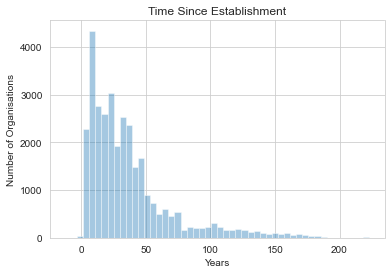

In [16]:
#Graph the distribution of time since establishment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(df['Time_Since_Establishment'],kde=False)
plt.title('Time Since Establishment')
plt.xlabel('Years')
plt.ylabel('Number of Organisations')
plt.show()

In [17]:
#Calcualte the average time since establishment
df['Time_Since_Establishment'].mean()

36.75224727300391

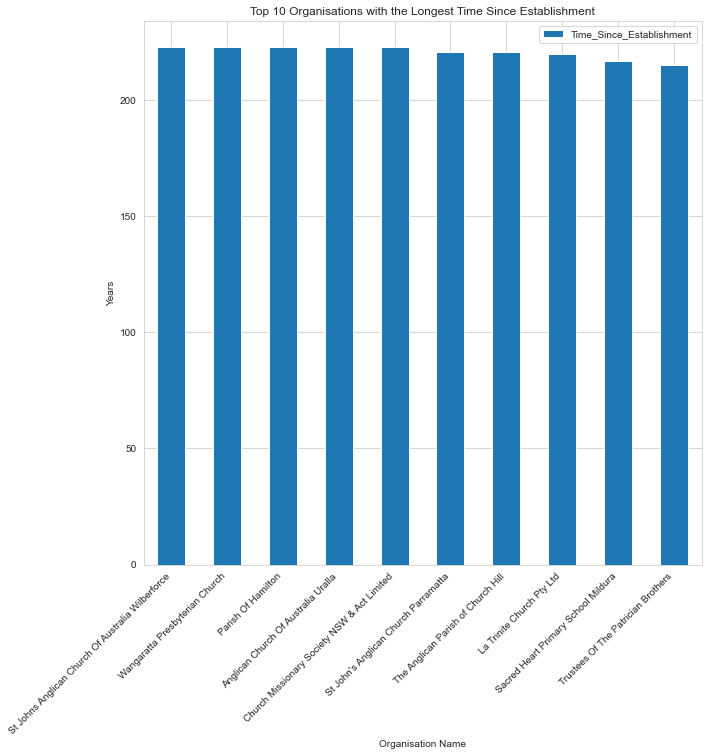

In [22]:
#Graph the top 10 organisations with the longest time since establishment
df.sort_values('Time_Since_Establishment',ascending=False).head(10).plot.bar(x='Legal_Name',y='Time_Since_Establishment')
#Make plotl arger
plt.gcf().set_size_inches(10, 10)
plt.title('Top 10 Organisations with the Longest Time Since Establishment')
#Make X labels slanted and aligned
plt.xticks(rotation=45, ha='right')
plt.xlabel('Organisation Name')

plt.ylabel('Years')
plt.show()

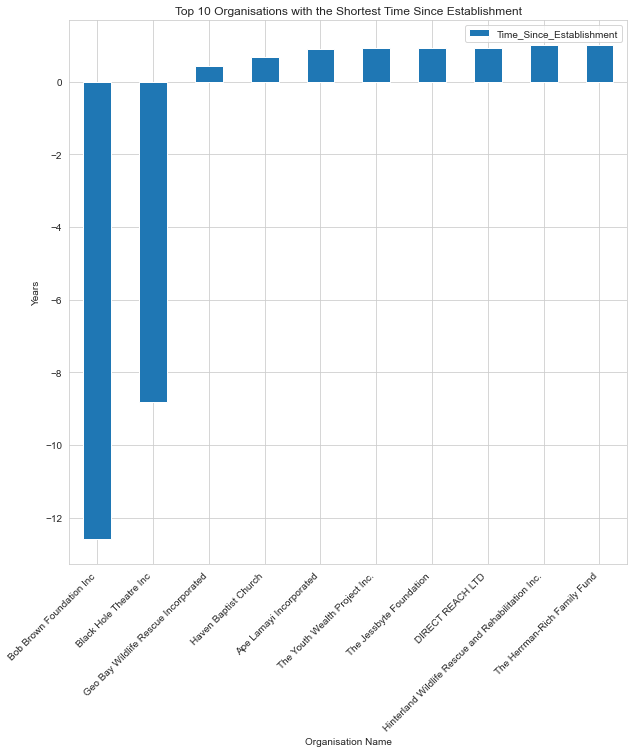

In [23]:
#Graph top 10 organisations with the shortest time since establishment
df.sort_values('Time_Since_Establishment',ascending=True).head(10).plot.bar(x='Legal_Name',y='Time_Since_Establishment')
plt.gcf().set_size_inches(10, 10)
plt.title('Top 10 Organisations with the Shortest Time Since Establishment')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Organisation Name')
plt.ylabel('Years')
plt.show()

In [26]:
#Find the Registration Date of the Bob Brown Foundation Inc
df[df['Legal_Name']=='Bob Brown Foundation Inc']['Date_Organisation_Established']

9463   2035-06-08
Name: Date_Organisation_Established, dtype: datetime64[ns]

To be established!

In [32]:
df.head()

,ABN,Index_Link,Legal_Name,Town/Suburb,State,Status,Size,website,revenue,expenses,causes,lastreport,religious_ref,Number_of_Responsible_Persons,Registration_Date,Date_Organisation_Established,Time_Since_Establishment
0,50624543616,https://www.acnc.gov.au/charity/charities/122e...,Golden Grove Uniting Church,Golden Grove,SA,Registered,Small,http://goldengroveuniting.org.au/,0.0,0.0,Adults - aged 25 to under 65; Children - aged ...,11 May 2022,1.0,7.0,2012-03-12,1977-01-01,45.876712
1,40513923847,https://www.acnc.gov.au/charity/charities/f04d...,Halifax Emergency Liaison Partnership Inc.,Halifax,QLD,Registered,Small,NaN,19775.0,19544.0,General community in Australia; Victims of dis...,14 Sep 2021,0.0,4.0,2012-03-12,2011-01-01,11.854795
2,99225453682,https://www.acnc.gov.au/charity/charities/3c85...,Balgownie Village Community Centre Inc.,Balgownie,NSW,Registered,Small,NaN,37267.0,71335.0,Adults - aged 25 to under 65; Families; Genera...,29 Jan 2019,0.0,4.0,2012-03-12,1988-01-01,34.871233
3,99295256377,https://www.acnc.gov.au/charity/charities/9083...,The Trustee For The Roy Ogden Foundation,Unavailable,Unavailable,Registered,Small,NaN,38021.0,42718.0,Families; Financially disadvantaged people; Ot...,30 Jan 2022,0.0,2.0,2012-03-12,1986-01-01,36.871233
4,66030355201,https://www.acnc.gov.au/charity/charities/fc88...,The Trustee For Jakob Foundation,Pymble,NSW,Registered,Small,NaN,0.0,0.0,Other; Other charities,3 Dec 2021,1.0,7.0,2012-03-12,1999-01-01,23.863014


In [31]:
#Find the number of organisations that are religious
df['religious_ref'].value_counts()

#Find the number of organisations that are religious as a percentage
df['religious_ref'].value_counts(normalize=True)

0.0    0.66565
1.0    0.33435
Name: religious_ref, dtype: float64

# Analysis of Causes

In [35]:
#Add all the causes to a list
causes = []
for i in df['causes']:
    causes.append(i)


In [36]:
#Analysis the most common causes in the list
from collections import Counter
Counter(causes).most_common(10)

[('General community in Australia', 5554),
 (nan, 1699),
 ('Other charities', 1354),
 ('Children - aged 6 to under 15', 1183),
 ('Early childhood - aged under 6', 781),
 ('Adults - aged 25 to under 65; Adults - aged 65 and over; Children - aged 6 to under 15; Early childhood - aged under 6; Families; Youth - 15 to under 25',
  614),
 ('Families', 587),
 ('Children - aged 6 to under 15; Early childhood - aged under 6', 553),
 ('Veterans and/or their families', 490),
 ('Children - aged 6 to under 15; Youth - 15 to under 25', 485)]

In [37]:
# Calculate the least common causes
Counter(causes).most_common()[:-10-1:-1]


[('Adults - aged 25 to under 65; Adults - aged 65 and over; Females; Financially disadvantaged people; Males; People at risk of homelessness/ people experiencing homelessness; People with chronic illness (including terminal illness); People with disabilities',
  1),
 ('Aboriginal and Torres Strait Islander people; Adults - aged 25 to under 65; Adults - aged 65 and over; Children - aged 6 to under 15; Early childhood - aged under 6; Families; Females; Financially disadvantaged people; General community in Australia; Males; People at risk of homelessness/ people experiencing homelessness; People in rural/regional/remote communities; People with chronic illness (including terminal illness); People with disabilities; Pre/post release offenders and/or their families; Unemployed persons; Veterans and/or their families; Victims of crime (including family violence); Victims of disaster; Youth - 15 to under 25',
  1),
 ('Adults - aged 65 and over; Financially disadvantaged people; General commu

Need to simplify the causes

In [40]:
#Calcualte frequency of nan values
df['causes'].isna().sum()

1699

## Days since last report

In [43]:
df.head(6)

,ABN,Index_Link,Legal_Name,Town/Suburb,State,Status,Size,website,revenue,expenses,causes,lastreport,religious_ref,Number_of_Responsible_Persons,Registration_Date,Date_Organisation_Established,Time_Since_Establishment
0,50624543616,https://www.acnc.gov.au/charity/charities/122e...,Golden Grove Uniting Church,Golden Grove,SA,Registered,Small,http://goldengroveuniting.org.au/,0.0,0.0,Adults - aged 25 to under 65; Children - aged ...,11 May 2022,1.0,7.0,2012-03-12,1977-01-01,45.876712
1,40513923847,https://www.acnc.gov.au/charity/charities/f04d...,Halifax Emergency Liaison Partnership Inc.,Halifax,QLD,Registered,Small,NaN,19775.0,19544.0,General community in Australia; Victims of dis...,14 Sep 2021,0.0,4.0,2012-03-12,2011-01-01,11.854795
2,99225453682,https://www.acnc.gov.au/charity/charities/3c85...,Balgownie Village Community Centre Inc.,Balgownie,NSW,Registered,Small,NaN,37267.0,71335.0,Adults - aged 25 to under 65; Families; Genera...,29 Jan 2019,0.0,4.0,2012-03-12,1988-01-01,34.871233
3,99295256377,https://www.acnc.gov.au/charity/charities/9083...,The Trustee For The Roy Ogden Foundation,Unavailable,Unavailable,Registered,Small,NaN,38021.0,42718.0,Families; Financially disadvantaged people; Ot...,30 Jan 2022,0.0,2.0,2012-03-12,1986-01-01,36.871233
4,66030355201,https://www.acnc.gov.au/charity/charities/fc88...,The Trustee For Jakob Foundation,Pymble,NSW,Registered,Small,NaN,0.0,0.0,Other; Other charities,3 Dec 2021,1.0,7.0,2012-03-12,1999-01-01,23.863014
5,83806857899,https://www.acnc.gov.au/charity/charities/e583...,The Disabled And Disadvantaged Childrens' Asso...,Burnside,QLD,Registered,Small,NaN,2800.0,2670.0,Children - aged 6 to under 15; Early childhood...,1 Feb 2021,0.0,4.0,2012-03-12,1985-01-01,37.871233


In [46]:
#Convert lastreport to a datetime object
df['lastreport'] = pd.to_datetime(df['lastreport'],errors='coerce')

#Calculate the time since last report
df['Time_Since_Last_Report'] = (pd.to_datetime('today') - df['lastreport']).dt.days

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_Since_Last_Report'>

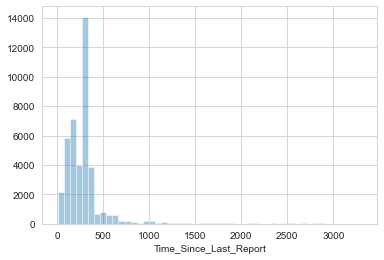

In [47]:
#Graph distribution of time since last report
sns.distplot(df['Time_Since_Last_Report'],kde=False)

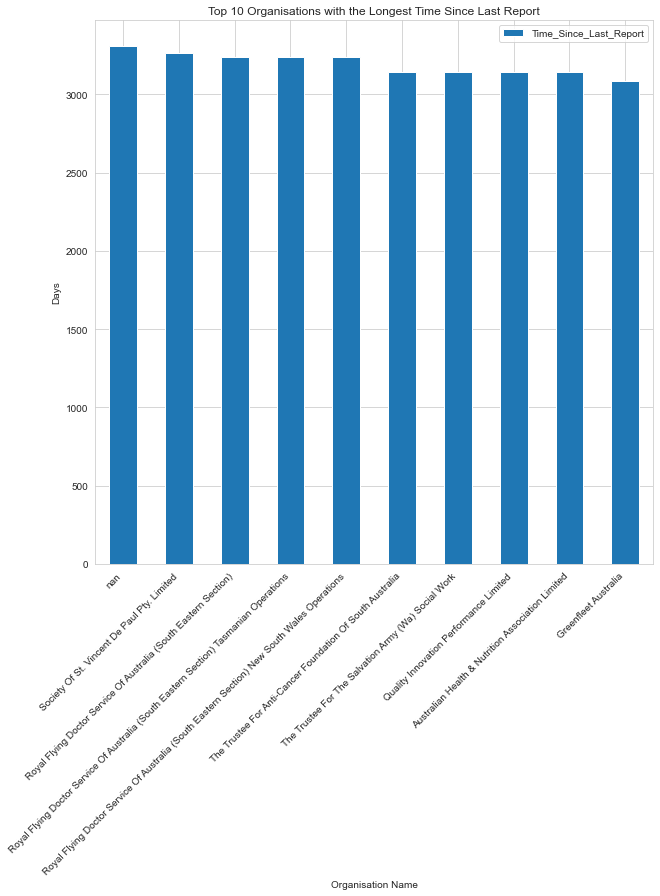

In [48]:
#Calculate the top 10 organisations with the longest time since last report
df.sort_values('Time_Since_Last_Report',ascending=False).head(10).plot.bar(x='Legal_Name',y='Time_Since_Last_Report')
plt.gcf().set_size_inches(10, 10)
plt.title('Top 10 Organisations with the Longest Time Since Last Report')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Organisation Name')
plt.ylabel('Days')
plt.show()

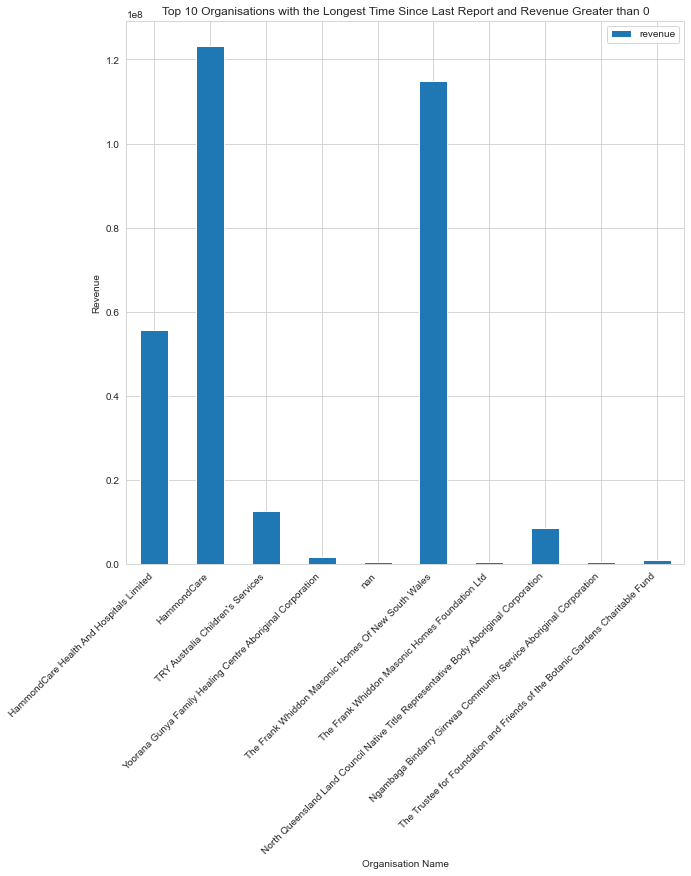

In [52]:
# Calculate the revenue of the top 10 organisations with the longest time since last report and with revenue greater than 0
df[df['revenue']>0].sort_values('Time_Since_Last_Report',ascending=False).head(10).plot.bar(x='Legal_Name',y='revenue')
plt.gcf().set_size_inches(10, 10)
plt.title('Top 10 Organisations with the Longest Time Since Last Report and Revenue Greater than 0')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Organisation Name')
plt.ylabel('Revenue')
plt.show()


# Revenue


In [54]:
#Print the causes of the top 10 organisations with the highest revenue
df.sort_values('revenue',ascending=False).head(10)['causes']


7675    Aboriginal and Torres Strait Islander people; ...
7827    Aboriginal and Torres Strait Islander people; ...
9869    Children - aged 6 to under 15; Other; People w...
901     Aboriginal and Torres Strait Islander people; ...
5668    Aboriginal and Torres Strait Islander people; ...
8157    Aboriginal and Torres Strait Islander people; ...
3382                       General community in Australia
9992    Children - aged 6 to under 15; Other; People w...
6053                       General community in Australia
133     Aboriginal and Torres Strait Islander people; ...
Name: causes, dtype: object

In [55]:
#Sub tract the expesnse from the revenue
df['profit'] = df['revenue'] - df['expenses']

<AxesSubplot:xlabel='Legal_Name'>

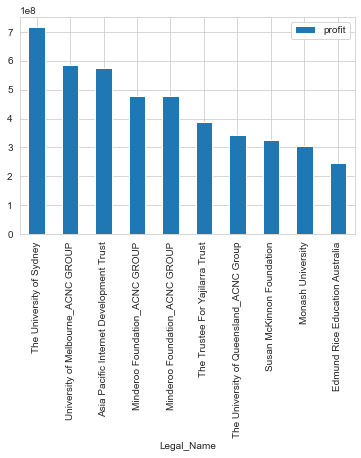

In [57]:
#Calcualte the top 10 organisations with the highest profit
df.sort_values('profit',ascending=False).head(10).plot.bar(x='Legal_Name',y='profit')


In [60]:
#Print the causes of the top 10 organisations with the highest profit and the legal name
df.sort_values('profit',ascending=False).head(10)[['Legal_Name','causes']]

,Legal_Name,causes
7675,The University of Sydney,Aboriginal and Torres Strait Islander people; ...
7827,University of Melbourne_ACNC GROUP,Aboriginal and Torres Strait Islander people; ...
1542,Asia Pacific Internet Development Trust,Other charities
248,Minderoo Foundation_ACNC GROUP,Aboriginal and Torres Strait Islander people; ...
1149,Minderoo Foundation_ACNC GROUP,Aboriginal and Torres Strait Islander people; ...
7094,The Trustee For Yajilarra Trust,Aboriginal and Torres Strait Islander people; ...
8157,The University of Queensland_ACNC Group,Aboriginal and Torres Strait Islander people; ...
4572,Susan McKinnon Foundation,General community in Australia; Overseas commu...
901,Monash University,Aboriginal and Torres Strait Islander people; ...
10065,Edmund Rice Education Australia,Aboriginal and Torres Strait Islander people; ...


# Number of Reposible Persons

In [61]:
df.head()

,ABN,Index_Link,Legal_Name,Town/Suburb,State,Status,Size,website,revenue,expenses,causes,lastreport,religious_ref,Number_of_Responsible_Persons,Registration_Date,Date_Organisation_Established,Time_Since_Establishment,Last_Report_Date,Time_Since_Last_Report,profit
0,50624543616,https://www.acnc.gov.au/charity/charities/122e...,Golden Grove Uniting Church,Golden Grove,SA,Registered,Small,http://goldengroveuniting.org.au/,0.0,0.0,Adults - aged 25 to under 65; Children - aged ...,2022-05-11,1.0,7.0,2012-03-12,1977-01-01,45.876712,2022-05-11,179.0,0.0
1,40513923847,https://www.acnc.gov.au/charity/charities/f04d...,Halifax Emergency Liaison Partnership Inc.,Halifax,QLD,Registered,Small,NaN,19775.0,19544.0,General community in Australia; Victims of dis...,2021-09-14,0.0,4.0,2012-03-12,2011-01-01,11.854795,2021-09-14,418.0,231.0
2,99225453682,https://www.acnc.gov.au/charity/charities/3c85...,Balgownie Village Community Centre Inc.,Balgownie,NSW,Registered,Small,NaN,37267.0,71335.0,Adults - aged 25 to under 65; Families; Genera...,2019-01-29,0.0,4.0,2012-03-12,1988-01-01,34.871233,2019-01-29,1377.0,-34068.0
3,99295256377,https://www.acnc.gov.au/charity/charities/9083...,The Trustee For The Roy Ogden Foundation,Unavailable,Unavailable,Registered,Small,NaN,38021.0,42718.0,Families; Financially disadvantaged people; Ot...,2022-01-30,0.0,2.0,2012-03-12,1986-01-01,36.871233,2022-01-30,280.0,-4697.0
4,66030355201,https://www.acnc.gov.au/charity/charities/fc88...,The Trustee For Jakob Foundation,Pymble,NSW,Registered,Small,NaN,0.0,0.0,Other; Other charities,2021-12-03,1.0,7.0,2012-03-12,1999-01-01,23.863014,2021-12-03,338.0,0.0


<AxesSubplot:>

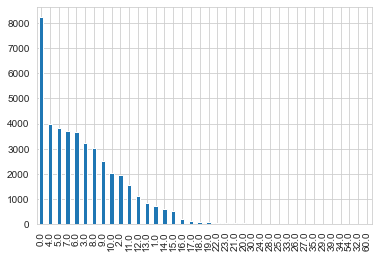

In [64]:
#Convert Number_of_Responsible_Persons to int except for the nan values
df['Number_of_Responsible_Persons'] = df['Number_of_Responsible_Persons'].fillna(0)

#Graph the number of reponsible persons
df['Number_of_Responsible_Persons'].value_counts().plot.bar()

In [66]:
#print the number of responsible persons for the top 10 organisations with the highest profit and their legal name
df.sort_values('profit',ascending=False).head(10)[['Legal_Name','Number_of_Responsible_Persons']]


,Legal_Name,Number_of_Responsible_Persons
7675,The University of Sydney,16.0
7827,University of Melbourne_ACNC GROUP,0.0
1542,Asia Pacific Internet Development Trust,6.0
248,Minderoo Foundation_ACNC GROUP,0.0
1149,Minderoo Foundation_ACNC GROUP,0.0
7094,The Trustee For Yajilarra Trust,5.0
8157,The University of Queensland_ACNC Group,0.0
4572,Susan McKinnon Foundation,5.0
901,Monash University,16.0
10065,Edmund Rice Education Australia,14.0


In [67]:
#Print the number of responsible persons for the top 10 organisations with longest time since last report and their legal name
df.sort_values('Time_Since_Last_Report',ascending=False).head(10)[['Legal_Name','Number_of_Responsible_Persons']]

,Legal_Name,Number_of_Responsible_Persons
7512,NaN,0.0
6566,Society Of St. Vincent De Paul Pty. Limited,0.0
10041,Royal Flying Doctor Service Of Australia (Sout...,14.0
2941,Royal Flying Doctor Service Of Australia (Sout...,0.0
5689,Royal Flying Doctor Service Of Australia (Sout...,9.0
1974,The Trustee For Anti-Cancer Foundation Of Sout...,3.0
8103,The Trustee For The Salvation Army (Wa) Social...,9.0
2348,Quality Innovation Performance Limited,6.0
5303,Australian Health & Nutrition Association Limited,9.0
7480,Greenfleet Australia,10.0


## Registration

In [68]:
#Calculate number of organisations not registered
df['Registration_Date'].isna().sum()

8239

In [73]:
#Number of unique status values
df['Status'].nunique()

#what are the unique status values
df['Status'].unique()

#Frequency of each status
df['Status'].value_counts()

#frequency of nan status
df['Status'].isna().sum()

500

In [74]:
#Find the top 10 organisations with the highest profit that have a status of nan
df[df['Status'].isna()].sort_values('profit',ascending=False).head(10)[['Legal_Name','profit']]


,Legal_Name,profit
7845,NaN,1974689.0
8151,NaN,1915117.0
6302,NaN,1421774.0
8183,NaN,1410946.0
8169,NaN,1251200.0
6049,NaN,917441.0
6383,NaN,823458.0
6079,NaN,797321.0
6391,NaN,796511.0
7552,NaN,740871.0


## States

<AxesSubplot:>

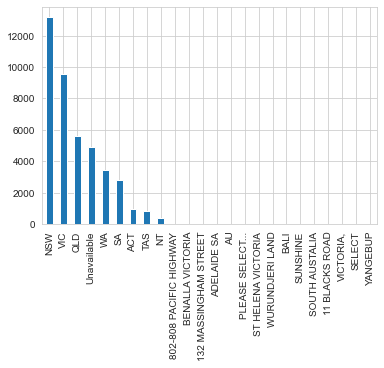

In [75]:
#Graph number of organisations within each state
df['State'].value_counts().plot.bar()

In [76]:
#Calcualte the sum of revenue for each state
df.groupby('State')['revenue'].sum().sort_values(ascending=False)


State
NSW                        4.991394e+10
VIC                        4.804615e+10
Unavailable                4.322665e+10
QLD                        2.711742e+10
WA                         1.666806e+10
SA                         9.417315e+09
ACT                        3.040373e+09
NT                         2.722281e+09
TAS                        2.621490e+09
11 BLACKS ROAD             1.431910e+07
AU                         4.234305e+06
VICTORIA,                  1.665930e+06
PLEASE SELECT...           6.301670e+05
SUNSHINE                   6.296320e+05
802-808 PACIFIC HIGHWAY    3.411360e+05
SOUTH AUSTALIA             2.149350e+05
ADELAIDE SA                1.809240e+05
132 MASSINGHAM STREET      4.657000e+04
YANGEBUP                   2.845000e+04
BALI                       1.757300e+04
BENALLA VICTORIA           1.322300e+04
WURUNDJERI LAND            1.800000e+03
SELECT                     0.000000e+00
ST HELENA VICTORIA         0.000000e+00
Name: revenue, dtype: float64

# Does religios affiliations mean more profit?

In [77]:
#Calculate the average profit of religious organisations
df[df['religious_ref']==1]['profit'].mean()

92851.95978276353

In [78]:
#Calculate the average profit of non religious organisations
df[df['religious_ref']==0]['profit'].mean()

476830.1827887111

In [79]:
#Calculate the difference in average profit between religious and non religious organisations
df[df['religious_ref']==1]['profit'].mean() - df[df['religious_ref']==0]['profit'].mean()

-383978.22300594754

Appears God helps those that help themselves

# Profit and revenue of those organisations that help the indigenious

In [82]:
#Calculate the average profit of organisations with a cause that contains the word Aboriginal excluding nan values
df[df['causes'].str.contains('Aboriginal',na=False)]['profit'].mean()


877039.8819436113

Text(0, 0.5, 'Profit')

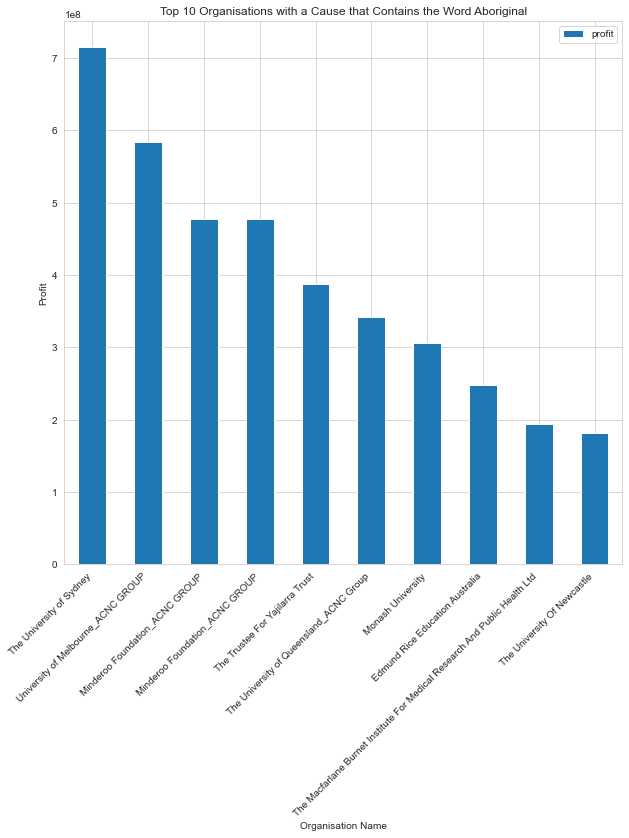

In [83]:
#PLot the profit of top 10 organisations with a cause that contains the word Aboriginal excluding nan values
df[df['causes'].str.contains('Aboriginal',na=False)].sort_values('profit',ascending=False).head(10).plot.bar(x='Legal_Name',y='profit')
plt.gcf().set_size_inches(10, 10)
plt.title('Top 10 Organisations with a Cause that Contains the Word Aboriginal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Organisation Name')
plt.ylabel('Profit')